# Homework 2: 12707 and 12607
Homework created by Ryan Albelda

#### This homework is adapted from Penn State's Applied Atmospheric Data Analysis class. 

Citation: 
Best Fit-Regression Example: CO2 & SLC | METEO 815: Applied Atmospheric Data Analysis. (n.d.). Retrieved January 24, 2025, from https://www.e-education.psu.edu/meteo815/node/623

#### Data set sources: 
- The first dataset is yearly global estimates for total carbon emissions from the Oak Ridge National Laboratory, dataset was downloaded from: https://github.com/owid/co2-data?tab=readme-ov-file
- The second dataset will be global average absolute sea level change. This dataset was created by Australia’s Commonwealth Scientific and Industrial Research Organization in collaboration with NOAA


#### Homework must be uploaded as singular PDF file on gradescope. 
- Do not upload a python file 
- Do not upload to canvas

When editing a cell with code in it, look for the ### parts to answer the homework 

This homework request you to leave comments in part of code too. 

# Part 1: Name and Objectives 


### Homework Objectives

1. **Understand key statistical tools used in climate data analysis**  
   - Learn how to calculate and interpret the **Pearson correlation coefficient** to assess linear relationships  
   - Understand how the **R-squared value** explains model fit in linear regression  
   - Explore the meaning and use of **Mean Squared Error (MSE)** as a model accuracy metric  

2. **Load and prepare climate datasets for analysis**  
   - Load historical **CO₂ emissions** and **sea level rise** data from CSV files using pandas  
   - Convert columns to appropriate data types (e.g., parse year columns to datetime format)  
   - Clean and extract relevant columns such as year, sea level change, and emissions values  

3. **Align and combine datasets based on overlapping time periods**  
   - Use pandas filtering to isolate matching years in both datasets  
   - Create a combined dataframe to support consistent time series analysis  

4. **Visualize climate trends using plots**  
   - Plot sea level rise and CO₂ emissions over time with proper labels and units  
   - Create scatter plots to compare emissions to sea level rise  
   - Add grid lines, trend lines, and customized titles to improve plot readability  

5. **Apply linear regression modeling to explore climate relationships**  
   - Fit a linear model using scikit-learn’s `LinearRegression` class  
   - Plot the regression line alongside raw data to visualize the fit  
   - Use correlation metrics to validate relationships observed in the plots  

6. **Evaluate regression model performance**  
   - Compute **R-squared** to measure explained variance in the target variable  
   - Calculate **MSE** to quantify prediction errors  
   - Compare results before and after fitting the model to determine improvement  

7. **Test a segmented modeling approach for improved accuracy**  
   - Split the dataset into two ranges based on a CO₂ threshold (e.g., 10,000 MtCO₂)  
   - Fit separate linear models to each range and compare performance metrics  
   - Justify the segmentation approach using visual and statistical evidence  

8. **Interpret model results and discuss limitations**  
   - Reflect on what statistical metrics reveal about model accuracy and bias  
   - Evaluate if splitting the data leads to meaningful improvement  
   - Summarize limitations of the linear model and propose next steps for better modeling  

#### 1) Name, Andrew ID, and time to complete homework

'###'

*answer here*

##### Homework consists of 7 parts, 12607 -> skip part 6. 

# Part 2: Questions about data and loading the data 


### 2) Climate data is different then weather data. We are less concerned about the accuracy of a single measurement. 

#### Explain why we are less concerned about the precision of a single measurement in climate data compared to weather data. 
##### Note: Accuracy still does matter, just not as much as it does for weather data.

'###'

*answer here* 

### 3) Load the CO2 dataset.

This file is a CSV, so the import will be slightly different than in Homework 1.

Fix any placeholder code such as import mathematical functions in python.

'###'

In [4]:
# Import packages: 
import pandas as pd
import numpy as np
### Fix this part of code to import a real python functon ### 
import mathematical functions in python

SyntaxError: invalid syntax (894126791.py, line 5)

In [5]:
# Load CO2 data 
## This time we are working with a CSV, the importing is a little different then last homework 
###
co2 = pd.read_()

NameError: name 'pd' is not defined

##### Notes on datatypes:

Data comes in various types: "A data type is a set of values and a set of operations defined on those values." 

Common data types: 
- Strings: used for text 
- Bool (Boolean): True and false data types
- Date_types: Used for dates
- float: floating point numbers with decimal places
- Int (integer): used for integer values.
    - can be known as int32 or int64 --> this has to do with the total number of digits in the data type

Learn more here: https://introcs.cs.princeton.edu/python/12types/

 

In [ ]:
# Here we checked the data type, it shows that it is an int64, not a year metric,
#code is needed to change to year 
print(co2_data['year'].dtype)
co2_data.year = pd.to_datetime(co2_data["year"], format="%Y")
CO2_time = co2_data["year"]

### 4) Why might it be useful to convert the data type to be a date data type compared to an int64 (integer value)?

Hint: look at the plots later in the homework to help understand why  

'###'

*answer here*

In [6]:
# Load in sea level rise data:  
## This time we are working with a CSV, the importing is a little different then last homework 
### set to be for csv 
sea_level_data = pd.read_('epa-sea-level.csv')

#Make sure the data type for year is in datatime format 
# Convert 'Year' and 'year' columns to datetime
sea_level_data['Year'] = pd.to_datetime(sea_level_data['Year'], format='%Y')


NameError: name 'pd' is not defined

In [ ]:
# Display the first few rows of both datasets to understand their structure
sea_level_data.head(), co2_data.head()

In [7]:
# Extract relevant columns
SL_time = sea_level_data['Year']
SL = sea_level_data['CSIRO Adjusted Sea Level']

### Above we used the pandas data frame head, please isolate the year and CO2 Column 
CO2_time = co2_data['CURRENTLY INCORRECT']
CO2 = co2_data['CHANGE ME']

# Calculate the overlapping time range
start_time = max(SL_time.min(), CO2_time.min())
end_time = min(SL_time.max(), CO2_time.max())

# Extract Sea Level and corresponding time
SL = SL[(SL_time >= start_time) & (SL_time <= end_time)]
time_SL = SL_time[(SL_time >= start_time) & (SL_time <= end_time)]

# Extract CO2 and corresponding time
CO2 = CO2[(CO2_time >= start_time) & (CO2_time <= end_time)]
time_CO2 = CO2_time[(CO2_time >= start_time) & (CO2_time <= end_time)]

# Ensure both datasets have the same time range for consistency
aligned_data = pd.DataFrame({
    "Year": time_SL.values,  # Align by year
    "Sea_Level": SL.values,
    "CO2": CO2.values
}).dropna()



NameError: name 'sea_level_data' is not defined

### 5) In your own words, explain what is happening in the following lines of code that align the datasets by overlapping time periods

'###'

In [ ]:
SL = SL[(SL_time >= start_time) & (SL_time <= end_time)]
time_SL = SL_time[(SL_time >= start_time) & (SL_time <= end_time)]


*answer here* 


# Part 3: Plotting the Data

NameError: name 'aligned_data' is not defined

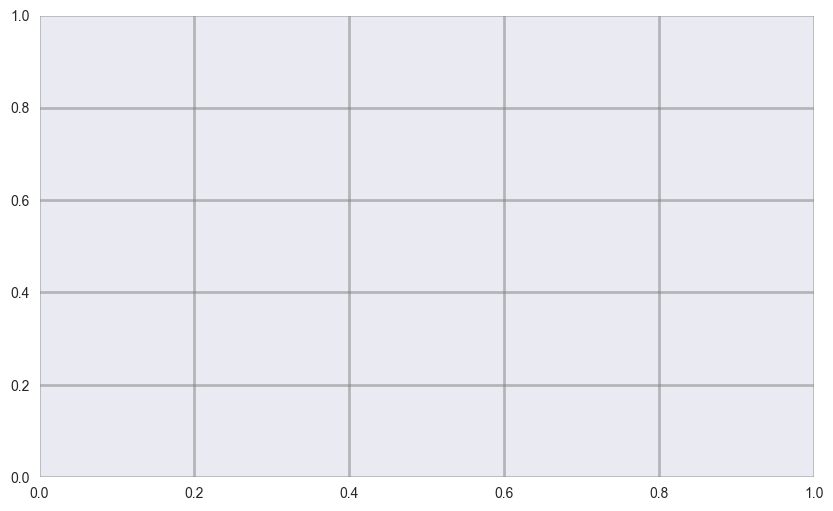

In [8]:
import matplotlib.pyplot as plt

# Plot Sea Level Change
plt.figure(figsize=(10, 6))
plt.grid(visible=True, linewidth=2, color='grey', alpha=0.5)
plt.plot(aligned_data['Year'], aligned_data['Sea_Level'], 
         label="Sea Level Change", linewidth=2)
plt.xlabel("Time")
plt.ylabel("Sea Level Change (Inches)")
plt.title("Annual Global Sea Level Change")
plt.xlim(start_time, end_time)
plt.show()


### 6) Create a plot of CO2 emissions over time using matplotlib. Ensure your plot has labeled axes, a title, and a grid.

'###'

In [ ]:
### Now Plot CO2 Emissions 
# HINT: only the lines
#plt.plot, title, and 1 label changes 



*As a reminder, the global sea level change is the cumulative sum*. 

*This means that the starting year (1880) is 0. Then, the anomaly of the sea level for the next year is added to the starting year. The anomaly for each sequential year is added to the previous total. The number at the end is the amount that the sea level has changed since 1880*.

*Around the year 2000, the sea level has increased by about 7 inches since 1880. You can see that the two variables do follow a similar pattern, so let’s plot CO2 vs. the sea level to investigate the relationship further*.

### 7) True or False: Do CO2 emissions and sea level rise appear to follow a similar trend?

'###'

*Answer here*

# Part 4: Linear Model 

Given that both graphs look similar lets plot them together. Fix some of the errors left in the plot.

Note:  You need to spot the errors in the plot. 

In [ ]:
# Plot CO2 vs. SL
plt.scatter(CO2, SL, c='blue', label='Data Points')

### Edit bellow, make this correct and the data fit in the plot
plt.xlabel("NH3 Emissions (Million Metric Tons of CO2)")
plt.ylabel("Sea Level Change (light-years)")
plt.title("Annual SOMETHING ")
plt.xlim(-10000, 3050)
plt.ylim(0, 10)

# Add grid --> This is correct and does not need to be changed
plt.grid(True, linewidth=2, color='grey')

### 8) Plot CO2 vs Sea Level. The original plotting code has intentional errors. Fix the axes labels and titles to reflect actual variables and units (e.g., "CO2 Emissions (MtCO2)" and "Sea Level Change (inches)").

Image is in the zip file for the homework called: "Plot-Goal-HW2.png"


*Note: we are looking for labels and titles on your plot, even a better scale to see the data*

'###'

In [ ]:
### Code to be added to your scatter plot above to create a NEW plot with the line and the data 

# Plot the line
x_line = np.arange(0, 40001, 1000)
y_line = np.linspace(3, 10, len(x_line))  # Adjusted to match the length of x_line
plt.plot(x_line, y_line, 'r-', linewidth=3, label='Trend Line')

# Show legend
plt.legend()

# Show plot
plt.show()

You can see that there appears to be a break around 5,000-10,000 CO2. Below that threshold, the data drops off at a different rate. This actually may be a candidate for two linear fits, one between 0 and 10,000 and one after, but for now, let’s focus on the dataset as a whole. Let’s check the correlation coefficient next.

In [ ]:
# Calculate the Pearson correlation coefficient
corr_pearson = np.corrcoef(aligned_data['Sea_Level'], aligned_data['CO2'])[0, 1]

print(f"The Pearson correlation coefficient between CO2 emissions and sea level change is {corr_pearson}.")

#### "Pearson's correlation coefficient (r) is a measure of the linear association of two variables. The values of correlation coefficient vary from –1 to +1." 

- Positive values of correlation coefficient indicate a tendency of one variable to increase or decrease together with another variable. 

- Negative values of correlation coefficient indicate a tendency that the increase of values of one variable is associated with the decrease of values of the other variable and vice versa.

(2008). Pearson’s Correlation Coefficient. In: Kirch, W. (eds) Encyclopedia of Public Health. Springer, Dordrecht. https://doi.org/10.1007/978-1-4020-5614-7_2569



### 9) Based on the Pearson correlation coefficient what do know about the relationship between our variables? Why do you think we checked for the value compared to just looking at the plot? 

'###'

*answer here*

  ### The assumptions for applying Pearson's correlation coefficient are 
- linear relationship between variables 
- continuous random variables 
- variables must be normally distributed 
 - variables must be independent of each other
 

#### Now we will run linear regression on the model

In [ ]:
from sklearn.linear_model import LinearRegression
# Linear regression model
X = aligned_data['CO2'].values.reshape(-1, 1)
y = aligned_data['Sea_Level'].values
model = LinearRegression()
model.fit(X, y)

# Plotting
plt.figure()
plt.scatter(aligned_data['CO2'], aligned_data['Sea_Level'], c='blue', label='Data Points')


### 10) Plot your scatter plot again. Add in grid lines, fix the labels, titles and add in the linear model line. 

'###'

In [ ]:

#### Edit bellow --> this is plotting code from above 
plt.xlabel("NH3 Emissions (Million Metric Tons of CO2)")
plt.ylabel("Sea Level Change (light-years)")
plt.title("Annual SOMETHING ")
plt.xlim(-10000, 3050)
plt.ylim(0, 10)
plt.grid(True, linewidth=2, color='grey')



# Plot the linear model --> DO NOT CHANGE THIS PART
x_line = np.arange(0, 40001, 1000)
y_line = model.predict(x_line.reshape(-1, 1))
plt.plot(x_line, y_line, 'r-', linewidth=3, label='Linear Model')

plt.legend()
plt.show()

This looks pretty good. Lets check the R-squared value and the Mean Squared Error (MSE) to see how well we did. 

# Part 5: R-squared and MSE

 #### R-squared helps you understand how well your model explains the variance in the target variable, while MSE gives you a sense of the accuracy of your model’s predictions. 
 
By using these metrics together, you can gain a deeper insight into the strengths and weaknesses of your regression model.

## R-squared
##### Often we are looking for a R-square that is close to 1, but there is a bit of nuance to that. 

"R-squared is the “percent of variance explained” by the model. That is, R-squared is the fraction by which the variance of the errors is less than the variance of the dependent variable. "

https://people.duke.edu/~rnau/rsquared.htm#:~:text=R%2Dsquared%20is%20the%20%E2%80%9Cpercent,variance%20of%20the%20dependent%20variable.

### 11) After training the model, add a code comment explaining what y represents in your regression. Print the R-squared value to two decimal places.
'###'

In [ ]:
#Lets explain some model variance: 
from sklearn.metrics import r2_score
# Calculate r-squared value
y_pred = model.predict(X)


### Insert a comment in the code to remind the user what y is here
r_squared = r2_score(y, y_pred)

### Write a print statement with just two decimals of the r_squared value too 
print(f"The R-squared value of the linear model is .")



### 12) Provide the link to the scikit-learn documentation for r2_score and summarize what it calculates.

'###'

*answer here*

## Mean Squared Error (MSE)

"mean squared error (MSE), the average squared difference between the value observed in a statistical study and the values predicted from a model" https://www.britannica.com/science/mean-squared-error

### 13) In your MSE calculation, add a comment explaining the variable y. Print the final MSE to two decimal places.

'###

In [ ]:
from sklearn.metrics import mean_squared_error
# Calculate Mean Squared Error (MSE)
y_pred = model.predict(X)

### Add a comment to remind the users of what y is here 
mse = mean_squared_error(y, y_pred)

print(f"The Mean Squared Error (MSE) of the linear model is {mse:.2f}.")

# Part 6: Improved Linear Model 
#### 12607 students: skip this part


Visually, the fit is pretty good except for CO2 emissions less than 10,000. 

Quantitatively, we get an R2 of 0.93 which is pretty good, but let’s split our data up into two parts and create two separate linear models. This may prove to be a better representation. I’m going to create two datasets, one for CO2 less than 10,000 and one for values greater. Let's also re-calculate the correlation. 


### 14) Add print statements showing the Pearson correlation coefficient for the split data (CO2 < 10,000 vs CO2 >= 10,000).

'###'

In [ ]:
# Split CO2 data
less_index = aligned_data[aligned_data['CO2'] < 10000].index
greater_index = aligned_data[aligned_data['CO2'] >= 10000].index

# Calculate Pearson correlation coefficient for each subset
corr_pearson_less = np.corrcoef(aligned_data.loc[less_index, 'CO2'], aligned_data.loc[less_index, 'Sea_Level'])[0, 1]
corr_pearson_greater = np.corrcoef(aligned_data.loc[greater_index, 'CO2'], aligned_data.loc[greater_index, 'Sea_Level'])[0, 1]

### Add in print statements 


#### Let's Plot again and split the data to have two linear regression lines: 

In [ ]:
# Linear regression model for CO2 < 10000
X_less = aligned_data.loc[less_index, 'CO2'].values.reshape(-1, 1)
y_less = aligned_data.loc[less_index, 'Sea_Level'].values
model_less = LinearRegression()
model_less.fit(X_less, y_less)

# Linear regression model for CO2 >= 10000
X_greater = aligned_data.loc[greater_index, 'CO2'].values.reshape(-1, 1)
y_greater = aligned_data.loc[greater_index, 'Sea_Level'].values

# Check if there are enough data points for the greater subset
if len(X_greater) > 0:
    model_greater = LinearRegression()
    model_greater.fit(X_greater, y_greater)

# Plotting
plt.figure()
plt.scatter(aligned_data['CO2'], aligned_data['Sea_Level'], c='blue', label='Data Points')
plt.xlabel("CO2 Emissions (Million Metric Tons of CO2)")
plt.ylabel("Sea Level Change (Inches)")
plt.title("Annual Global CO2 vs. SL Change")
plt.xlim(0, 40000)
plt.ylim(0, 10)
plt.grid(True, linewidth=2, color='grey')

# Plot the linear model for CO2 < 10000
x_line_less = np.arange(0, 10000)
y_line_less = model_less.predict(x_line_less.reshape(-1, 1))
plt.plot(x_line_less, y_line_less, 'r-', linewidth=3, label='Linear Model (CO2 < 10000)')

# Plot the linear model for CO2 >= 10000 if there are enough data points
if len(X_greater) > 0:
    x_line_greater = np.arange(10000, 40001)
    y_line_greater = model_greater.predict(x_line_greater.reshape(-1, 1))
    plt.plot(x_line_greater, y_line_greater, 'g-', linewidth=3, label='Linear Model (CO2 >= 10000)')

plt.legend()
plt.show()

In [ ]:
# THIS IS HERE FOR REFERENCE 

# Check if there are enough data points for the greater subset
if len(X_greater) > 0:
    model_greater = LinearRegression()
    model_greater.fit(X_greater, y_greater)
 

### 15) Explain why we need to check if there are enough data points for the higher CO2 range before fitting a model.

'###'

*Answer here*

In [ ]:
### Comment line by line here with this code and explain what is doing: 

# Plot the linear model for CO2 >= 10000 if there are enough data points
if len(X_greater) > 0:
    #### write comments here 
    x_line_greater = np.arange(10000, 40001)
      #range of CO2 emissions for which the linear model will be plotted, the array contains values starting from 10,000 up to (but not including) 40,001,
    y_line_greater = model_greater.predict(x_line_greater.reshape(-1, 1))
      #### write comments here 
    plt.plot(x_line_greater, y_line_greater, 'g-', linewidth=3, label='Linear Model (CO2 >= 10000)')
      # Makes a good looking plot 


### Lets solve our R-squared and MSE again and see if things improved 

In [ ]:
# Calculate MSE and R-squared value for CO2 < 10000
mse_less = mean_squared_error(y_less, model_less.predict(X_less))
r_squared_less = r2_score(y_less, model_less.predict(X_less))

print(f"MSE for CO2 < 10000: {mse_less:.2f}")
print(f"R-squared for CO2 < 10000: {r_squared_less:.2f}")



### 16) Replace the question marks in the code calculating MSE and R-squared for the higher CO2 subset with the correct model variable.

'###'

In [ ]:
# Calculate MSE and R-squared value for CO2 >= 10000

### Replace the question marks with the correct variable 
mse_greater = mean_squared_error(y_greater, ? .predict(X_greater))
r_squared_greater = r2_score(y_greater, ? .predict(X_greater))

print(f"MSE for CO2 >= 10000: {mse_greater:.2f}")
print(f"R-squared for CO2 >= 10000: {r_squared_greater:.2f}")


# Part 7: Discussion 

### 17) Based on your split-model results (MSE and R-squared), does splitting the data improve the model fit? Why or why not?
'###'

This question directly addresses the comparison of model performance before and after splitting the data, focusing on the metrics (MSE and R-squared) to evaluate the fit.

*answer here*

### Lets learn a bit more about R-squared: 

Visit the following website from Duke. https://people.duke.edu/~rnau/rsquared.htm#punchline, 

#### 18) Write 3-5 bullet points with summary notes from the section: Guidelines for interpreting R-squared (Bottom part of the page starts with "So, what IS a good value").  

'###'

* Bullet point 1 
* Bullet point 2 
* Bullet point 3

### Lets learn a bit more about MSE: 
#### 19) Why is it hard to define a "good" MSE value? Write a brief explanation.

'###'

*answer here*
